# Feature Engineering

Parte: T-Bag

Features:
* Mileage
* Transmission
* Fuel_Type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import data
data = pd.read_csv('../input/train.csv')
# visualize first 5 rows
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [3]:
print(data.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


## Fuel_Type


In [4]:
print(data['Fuel_Type'].nunique())
print(data['Fuel_Type'].unique())

3
['Diesel' 'Petrol' 'Electric']


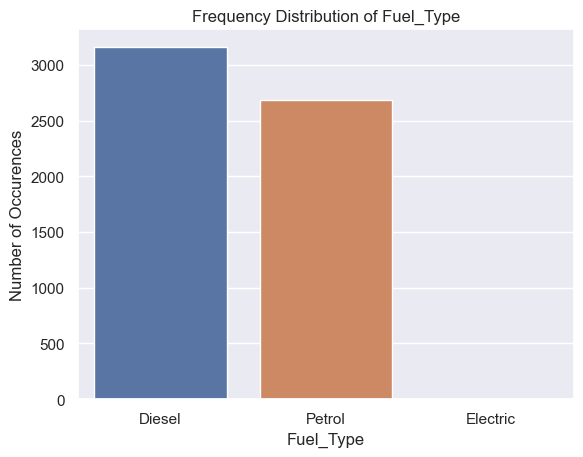

Fuel_Type
Diesel      3161
Petrol      2684
Electric       2
Name: count, dtype: int64


In [5]:
incidents_count = data['Fuel_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Fuel_Type')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Fuel_Type', fontsize=12)
plt.show()
print(incidents_count)

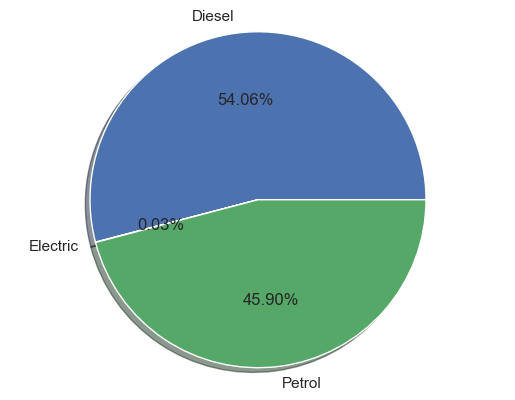

In [6]:
labels = data['Fuel_Type'].astype('category').cat.categories.tolist()
counts = data['Fuel_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()

### Discretizar

In [7]:
replace_map = {'Fuel_Type': { 'Diesel': 1, 'Petrol': 2, 'Eletric': 3}}
print(replace_map)

{'Fuel_Type': {'Diesel': 1, 'Petrol': 2, 'Eletric': 3}}


In [8]:
data.replace(replace_map, inplace=True)
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,2,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,1,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,1,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,1,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,1,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## Transmission

Analisar os valores e se tem valores em falta

In [9]:
print(f"Número de valores em falta: {data['Transmission'].isnull().sum()}")
print(f"Número de valores distintos: {data['Transmission'].nunique()}")
print(f"Tipo da coluna {data['Transmission'].dtypes}")
print(data['Transmission'].head())

Número de valores em falta: 0
Número de valores distintos: 2
Tipo da coluna object
0       Manual
1       Manual
2       Manual
3    Automatic
4       Manual
Name: Transmission, dtype: object


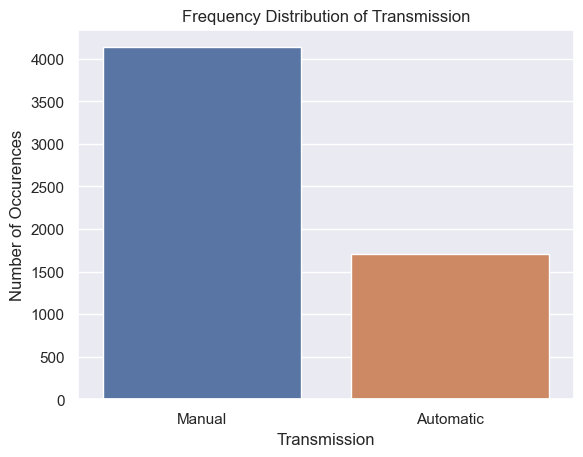

Transmission
Manual       4135
Automatic    1712
Name: count, dtype: int64


In [10]:
incidents_count = data['Transmission'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Transmission')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.show()
print(incidents_count)

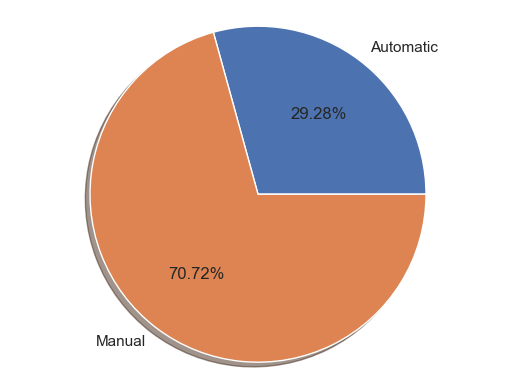

In [11]:
labels = data['Transmission'].astype('category').cat.categories.tolist()
counts = data['Transmission'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [12]:
replace_map2 = {'Transmission': { 'Manual': 1, 'Automatic': 2}}
print(replace_map2)

{'Transmission': {'Manual': 1, 'Automatic': 2}}


In [13]:
data.replace(replace_map2, inplace=True)
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,1,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,2,1,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,1,1,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,2,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,1,1,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,1,1,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,1,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,1,1,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,2,1,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [14]:
## Mileage

In [31]:
print(f"Número de valores em falta: {data['Mileage'].isnull().sum()}")
print(f"Número de valores distintos: {data['Mileage'].nunique()}")
print(f"Tipo da coluna {data['Mileage'].dtypes}")
print(data['Mileage'].head())
print(data['Mileage'].count())

Número de valores em falta: 2
Número de valores distintos: 419
Tipo da coluna object
0    19.67 kmpl
1      13 km/kg
2    20.77 kmpl
3     15.2 kmpl
4    23.08 kmpl
Name: Mileage, dtype: object
5845


Após uma análise inicial, conseguimos verificar a existência de 2 missing values. Vamos procedir com a remoção dos mesmos

In [34]:
data = data[data['Mileage'].notna()]

In [35]:
print(f"Número de valores em falta: {data['Mileage'].isnull().sum()}")



Número de valores em falta: 0
Número de valores distintos: 419
Tipo da coluna object
0    19.67 kmpl
1      13 km/kg
2    20.77 kmpl
3     15.2 kmpl
4    23.08 kmpl
Name: Mileage, dtype: object
5845


De seguida, trataremos do problema de existirem 2 tipos de unidades: km/kg e kmpl. Como o valor de km/kg é bastante menor que kmpl iremos converter estas unidades para kmpl.

In [75]:
MileageKMPL = []


for index,row in data.iterrows():
    m = row['Mileage']
    if 'km/kg' in m:
        m = m[:-6]
        if 1==row['Fuel_Type']:
            m = float(m)*0.84
            MileageKMPL.append(float(m))
        else:
            m = float(m)*0.75
            MileageKMPL.append(float(m))
    else:
        m = m[:-5]
        MileageKMPL.append(float(m))

In [76]:
data['Mileage']=MileageKMPL
data.Mileage.head()

0    19.67
1     9.75
2    20.77
3    15.20
4    23.08
Name: Mileage, dtype: float64